# Grow 90 Internship Task
(Putting SMS into work)
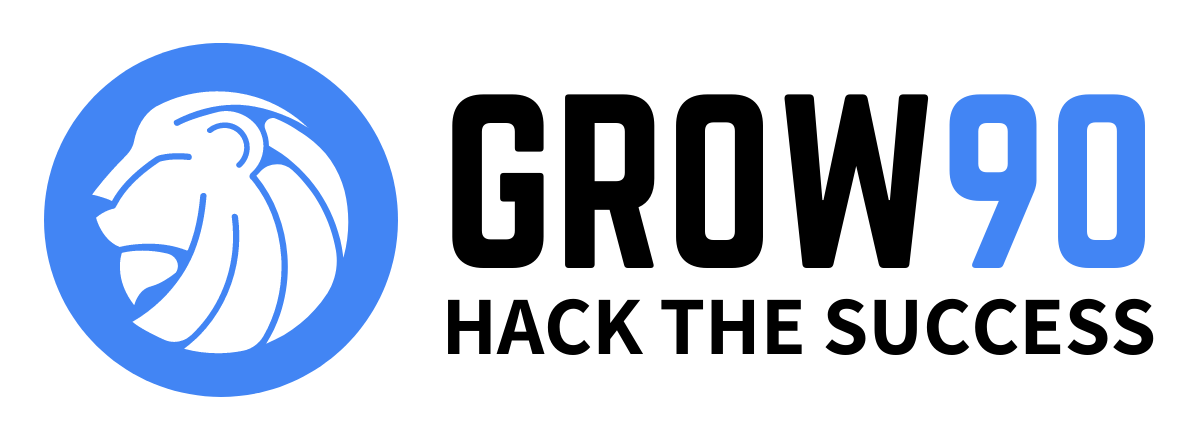



#### Nohan Joemon
#### CH19B072

# Problem Statement

#### Putting Sms Into Work

1. You need to analyse the sms data and answer the questions listed below.
2. You are free to use anything of your choice.
3. The data provided is highly sensitive so please don't share with anyone

### (a) Filter out transactional messages of a user(10 pts)

### (b) His/her expense and earning for a particular month (40 pts)

### (c) Any Extra insights (60 pts)

## Importing Data



*   Mounting google drive so that the dataset is directly accessible from google drive:



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Installing and Importing important packages:


In [ ]:
pip install Jpype1==0.7.5   # Higher versions produced error 

     |████████████████████████████████| 3.6 MB 26.5 MB/s 


In [ ]:
pip install duckling     

     |████████████████████████████████| 4.2 MB 29.9 MB/s 


In [ ]:
import json
import pandas as pd
import duckling
import matplotlib.pyplot as plt



*   Importing the dataset and exploring:


In [ ]:
data = pd.read_json("/content/drive/MyDrive/Grow90/data_small.json")

In [ ]:
data.head()

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay
0,4317860,ADSBUXIN,"Hi, our siren is at home and safe and we hope ...",2020-03-25 07:33:39.442,2021-09-16 04:43:11.234,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
1,4317861,TMKOTAKB,"Due to COVID-19, some of the banking services ...",2020-03-25 06:34:38.445,2021-09-16 04:43:11.236,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
2,4317862,ADMONVEW,Youre a few steps away from completing your Cr...,2020-03-25 06:04:45.183,2021-09-16 04:43:11.238,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
3,4317863,VKEZHOME,"Hi Niraj, a special Home Loan offer for you: \...",2020-03-25 06:02:46.155,2021-09-16 04:43:11.241,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True
4,4317864,JXJIOMNY,"Dear JioMoney Customer, Pay from Home using My...",2020-03-25 05:54:36.521,2021-09-16 04:43:11.244,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN,True


In [ ]:
# Listing down all the users id
data["user_id"].unique()

array(['40ec6ba2-af1b-4037-9e01-3d108faa937b',
       'e1eb6177-cf74-4727-b1c5-370d6c1a5fd1',
       '301ff388-c5ae-4dff-b6f5-83103cbbb5d0',
       'e042e6b7-466a-4ba9-af43-90d3eb346ccc',
       '6a453330-9801-4208-b0e0-9bc8f3608ec4',
       '6f28bcf7-9e64-423b-8d7b-ea7c03f5f691',
       'c385fa59-8d9b-4f4e-9f41-ea3dc454b488',
       'feb6542d-b15e-4eac-b1a8-b68b2e8a3f58',
       '8f659f61-b21c-48ae-9a11-e73e0130a02f',
       'cce50213-e98e-4390-bdd5-c86323071760',
       'd526455c-b4e4-4807-b12c-29278a65fe55',
       '05748776-fe93-4f90-8a49-40f1cab76be6',
       '87865ed3-3b06-42fe-bf87-857feff5fb9a',
       'f5a33af3-2852-4ec2-8b8a-967cabbb7864',
       'fcadb10d-c4a8-407a-8c3a-9a11bc7ade75',
       '2f33a137-840d-4a61-8fa2-2b1036c6b4de',
       'c364cbfe-4232-4716-a5d7-11379520e5ba',
       'f1c22112-db6f-42aa-859a-de53c7b82e7b',
       '32f60934-a312-42da-a767-26242c5a236f',
       '940fd2e3-880c-4ec9-8c66-66f7cb25e6a6',
       '6894da3f-a76e-4152-b91e-3bc186107a39',
       '25d3f

## Selecting the messages of a particular user for the subsequent analysis
Note that I changed the user id given in the question because that id was not available in the smaller dataset

In [ ]:
# msg of a given user id
user_msg = data[data["user_id"]=="29ae2f1d-549d-410e-a461-898c1b0b7fd3"]


In [ ]:
print(user_msg.shape)
user_msg.head()

(1627, 8)


,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay
666223,4992534,57575701,PayPal: Your security code is: 337302. It expi...,2021-09-04 11:00:40.785,2021-09-16 23:40:02.143,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
666344,4992760,ADNHPSMS,Your OTP to register/access CoWIN is 174014. I...,2021-08-26 15:10:42.497,2021-09-16 23:40:02.743,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
666672,4992761,AXMyGovt,Your Aarogya Setu one time password is 248287....,2021-08-26 15:10:23.373,2021-09-16 23:40:02.746,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
667099,4992762,AX899671,SPIN & WIN! Get exciting offers on your favour...,2021-08-26 14:08:52.553,2021-09-16 23:40:02.748,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
667202,4992827,ADIPRUMF,"Greetings, ICICI Prudential Mutual Fund wishes...",2021-08-24 03:09:36.666,2021-09-16 23:40:02.936,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True


## Selecting a month - September

### Extracting a new feature 'month' from the existing feature 'timestamp'

In [ ]:
user_msg

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay
666223,4992534,57575701,PayPal: Your security code is: 337302. It expi...,2021-09-04 11:00:40.785,2021-09-16 23:40:02.143,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
666344,4992760,ADNHPSMS,Your OTP to register/access CoWIN is 174014. I...,2021-08-26 15:10:42.497,2021-09-16 23:40:02.743,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
666672,4992761,AXMyGovt,Your Aarogya Setu one time password is 248287....,2021-08-26 15:10:23.373,2021-09-16 23:40:02.746,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
667099,4992762,AX899671,SPIN & WIN! Get exciting offers on your favour...,2021-08-26 14:08:52.553,2021-09-16 23:40:02.748,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
667202,4992827,ADIPRUMF,"Greetings, ICICI Prudential Mutual Fund wishes...",2021-08-24 03:09:36.666,2021-09-16 23:40:02.936,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
...,...,...,...,...,...,...,...,...
3123539,8909351,JMGROWWZ,Reminder: Complete AutoPay setup for secure au...,2021-09-17 04:20:11.768,2021-10-02 14:35:12.429,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True
3123541,4992844,TMICICIB,258452 is OTP for txn of INR 799.00 at Netflix...,2021-08-22 21:55:11.863,2021-09-16 23:40:02.978,29ae2f1d-549d-410e-a461-898c1b0b7fd3,5652.0,True
3123542,4993410,ADICICIB,"Dear Customer, transaction of INR 899.00 done ...",2021-07-31 17:09:23.521,2021-09-16 23:40:04.568,29ae2f1d-549d-410e-a461-898c1b0b7fd3,8877.0,True
3123543,4992843,JMICICIB,"Dear Customer, INR 799.00 is debited on ICICI ...",2021-08-22 21:55:44.624,2021-09-16 23:40:02.976,29ae2f1d-549d-410e-a461-898c1b0b7fd3,5652.0,True


In [ ]:
user_msg['month'] = pd.DatetimeIndex(user_msg['timestamp']).month
user_msg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay,month
666223,4992534,57575701,PayPal: Your security code is: 337302. It expi...,2021-09-04 11:00:40.785,2021-09-16 23:40:02.143,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
666344,4992760,ADNHPSMS,Your OTP to register/access CoWIN is 174014. I...,2021-08-26 15:10:42.497,2021-09-16 23:40:02.743,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,8
666672,4992761,AXMyGovt,Your Aarogya Setu one time password is 248287....,2021-08-26 15:10:23.373,2021-09-16 23:40:02.746,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,8
667099,4992762,AX899671,SPIN & WIN! Get exciting offers on your favour...,2021-08-26 14:08:52.553,2021-09-16 23:40:02.748,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,8
667202,4992827,ADIPRUMF,"Greetings, ICICI Prudential Mutual Fund wishes...",2021-08-24 03:09:36.666,2021-09-16 23:40:02.936,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,8
...,...,...,...,...,...,...,...,...,...
3123539,8909351,JMGROWWZ,Reminder: Complete AutoPay setup for secure au...,2021-09-17 04:20:11.768,2021-10-02 14:35:12.429,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
3123541,4992844,TMICICIB,258452 is OTP for txn of INR 799.00 at Netflix...,2021-08-22 21:55:11.863,2021-09-16 23:40:02.978,29ae2f1d-549d-410e-a461-898c1b0b7fd3,5652.0,True,8
3123542,4993410,ADICICIB,"Dear Customer, transaction of INR 899.00 done ...",2021-07-31 17:09:23.521,2021-09-16 23:40:04.568,29ae2f1d-549d-410e-a461-898c1b0b7fd3,8877.0,True,7
3123543,4992843,JMICICIB,"Dear Customer, INR 799.00 is debited on ICICI ...",2021-08-22 21:55:44.624,2021-09-16 23:40:02.976,29ae2f1d-549d-410e-a461-898c1b0b7fd3,5652.0,True,8


### Selecting the month of September (random choice)

In [ ]:
user_msg_sept=user_msg[user_msg['month']==9]
user_msg_sept

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay,month
666223,4992534,57575701,PayPal: Your security code is: 337302. It expi...,2021-09-04 11:00:40.785,2021-09-16 23:40:02.143,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668848,4992295,TXZESTMK,"Dear Suraj,\n \nBuy the coolest electronics on...",2021-09-16 15:23:21.025,2021-09-16 23:40:01.479,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668849,4992296,JXSWIGGY,Your order #114872366712 was delivered well be...,2021-09-16 13:44:00.541,2021-09-16 23:40:01.485,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668850,4992297,ADICICIB,ICICI Bank Acct XXX654 debited for INR 142.00 ...,2021-09-16 12:59:47.595,2021-09-16 23:40:01.488,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668851,4992298,+919311580604,Lodha Presents Codename Limited Edition at Mul...,2021-09-16 11:09:56.610,2021-09-16 23:40:01.491,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
...,...,...,...,...,...,...,...,...,...
3123536,8909348,ADICICIB,ICICI Bank Acct XXX654 debited for INR 280.00 ...,2021-09-17 07:43:48.369,2021-10-02 14:35:12.421,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
3123537,8909349,ADNHPSMS,Your OTP to register/access CoWIN is 732580. I...,2021-09-17 05:29:20.595,2021-10-02 14:35:12.424,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
3123538,8909350,57575701,<#> Your Uber code is 7770. Reply STOP to +91 ...,2021-09-17 04:34:21.420,2021-10-02 14:35:12.426,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
3123539,8909351,JMGROWWZ,Reminder: Complete AutoPay setup for secure au...,2021-09-17 04:20:11.768,2021-10-02 14:35:12.429,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9


## Filtering out transactional messages of the user during September

### Filtering out all transactional messages of the user:

In [ ]:
transactional_messages = user_msg_sept.loc[user_msg_sept['message'].str.contains(" credited | debited | charged | sent | paid | txn | billed | transaction ", case=False)]

In [ ]:
transactional_messages

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay,month
668850,4992297,ADICICIB,ICICI Bank Acct XXX654 debited for INR 142.00 ...,2021-09-16 12:59:47.595,2021-09-16 23:40:01.488,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668859,4992306,ADICICIB,ICICI Bank Acct XXX654 debited for INR 213.00 ...,2021-09-16 08:43:20.116,2021-09-16 23:40:01.514,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668875,4992322,AXICICIB,ICICI Bank Acct XXX654 debited for INR 179.00 ...,2021-09-15 10:21:15.456,2021-09-16 23:40:01.557,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668884,4992331,AXICICIB,ICICI Bank Acct XXX654 debited for INR 144.00 ...,2021-09-14 18:04:53.873,2021-09-16 23:40:01.581,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668885,4992332,JXSWIGGY,Your payment for Swiggy order #114717700574 wa...,2021-09-14 18:04:15.112,2021-09-16 23:40:01.584,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
...,...,...,...,...,...,...,...,...,...
3123526,8909338,VKTATALI,Alert! Premium of Rs. 2523.44 due on 30/09/202...,2021-09-17 12:54:22.301,2021-10-02 14:35:12.395,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
3123532,8909344,AXICICIB,ICICI Bank Acct XXX654 debited for INR 230.00 ...,2021-09-17 09:10:18.467,2021-10-02 14:35:12.412,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
3123533,8909345,ADSLCEIT,"Fraud Alert: Ignore any suspicious calls, emai...",2021-09-17 09:01:04.898,2021-10-02 14:35:12.414,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
3123536,8909348,ADICICIB,ICICI Bank Acct XXX654 debited for INR 280.00 ...,2021-09-17 07:43:48.369,2021-10-02 14:35:12.421,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9


### Dividing transactional messages into messages that give info about expenses and those that give info about earnings



*   I have chosen messages containing the words "spent" or  "debited" or "charged" or "paid" or "sent" or "billed" as the messages that give info about expenses



In [ ]:
transactional_messages_expenses = transactional_messages.loc[transactional_messages['message'].str.contains(" spent | debited | charged | paid | sent | billed ", case=False)]



*   I have chosen messages containing the word "credit" and non containing the word "debit" as the messages that give info about earnings

**Note:** The second condition in the above statement was added because some messages like "ICICI Bank Acct XXX654 debited for INR 142.00 on 16-Sep-21 & SWIGGY credited.UPI:125929607185.Call 18002662 for dispute or SMS BLOCK 654 to 9215676766." has both 'debited' and 'credited' in them but are actually concerned with expenses and not earnings

In [ ]:
transactional_messages_earnings = transactional_messages.loc[transactional_messages['message'].str.contains("credited", case=False)]

# Considering only messages that does not contain 'debited'
transactional_messages_earnings = transactional_messages_earnings.loc[~transactional_messages['message'].str.contains("debited", case=False)]


In [ ]:
print("Messages giving info about Expenses: ",transactional_messages_expenses.shape[0])
transactional_messages_expenses.head()

Messages giving info about Expenses:  80


,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay,month
668850,4992297,ADICICIB,ICICI Bank Acct XXX654 debited for INR 142.00 ...,2021-09-16 12:59:47.595,2021-09-16 23:40:01.488,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668859,4992306,ADICICIB,ICICI Bank Acct XXX654 debited for INR 213.00 ...,2021-09-16 08:43:20.116,2021-09-16 23:40:01.514,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668875,4992322,AXICICIB,ICICI Bank Acct XXX654 debited for INR 179.00 ...,2021-09-15 10:21:15.456,2021-09-16 23:40:01.557,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668884,4992331,AXICICIB,ICICI Bank Acct XXX654 debited for INR 144.00 ...,2021-09-14 18:04:53.873,2021-09-16 23:40:01.581,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668885,4992332,JXSWIGGY,Your payment for Swiggy order #114717700574 wa...,2021-09-14 18:04:15.112,2021-09-16 23:40:01.584,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9


In [ ]:
print("Messages giving info about Earnings: ",transactional_messages_earnings.shape[0])
transactional_messages_earnings.head()

Messages giving info about Earnings:  17


,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay,month
668929,4992376,AXICICIB,"Dear Customer, Account XXX654 is credited with...",2021-09-12 11:31:22.390,2021-09-16 23:40:01.698,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668954,4992401,VMICICIB,"Dear Customer, Account XXX654 is credited with...",2021-09-10 12:42:49.997,2021-09-16 23:40:01.769,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
668988,4992435,VDICICIB,"Dear Customer, your ICICI Bank Account XX654 h...",2021-09-09 03:36:57.298,2021-09-16 23:40:01.858,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
669043,4992489,ADAIRTEL,"Dear Suraj iyer,your mobile number7303629620 i...",2021-09-06 04:05:15.477,2021-09-16 23:40:02.007,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9
669046,4992492,ADAIRTEL,Welcome to Airtel Postpaid! We?ve credited Rs....,2021-09-06 03:41:25.874,2021-09-16 23:40:02.015,29ae2f1d-549d-410e-a461-898c1b0b7fd3,NaN,True,9


### No of messages giving info about expenses is higher than those giving info about earnings

This is expected because usually for an individual, earnings arrive in large amounts in a few transactions, but expenses happen in small amounts but a large no of transactions

## Finding total expense and total earning of the user based on SMS data

In [ ]:
d= duckling.DucklingWrapper()

/usr/local/lib/python3.7/dist-packages/jpype/_core.py:209: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


### Earnings

In [ ]:
message_texts_earnings = transactional_messages_earnings['message'].values
duckling_dictionary_earnings=[]
for i in range(message_texts_earnings.shape[0]):
  duckling_dictionary_earnings.append(d.parse_money(message_texts_earnings[i]))

In [ ]:
duckling_dictionary_earnings[0] # just an example

[{'dim': 'amount-of-money',
  'end': 57,
  'start': 47,
  'text': 'INR 500.00',
  'value': {'unit': 'INR', 'value': 500.0}}]

In [ ]:
total_earnings = 0
unit=[]
for t in duckling_dictionary_earnings:
  if t:
    total_earnings=total_earnings+t[0]['value']['value']
    unit.append(t[0]['value']['unit'])

unit=list(set(unit))
print("Units present in the messages ",unit)
print("Total Earnings = ",unit[0],total_earnings)

Units present in the messages  ['INR']
Total Earnings =  INR 148355.15


### Total Earnings of the user in the month of September =  INR 1,48,355.15

### Expenses

In [ ]:
message_texts_expenses = transactional_messages_expenses['message'].values
duckling_dictionary_expenses=[]
for i in range(message_texts_expenses.shape[0]):
  duckling_dictionary_expenses.append(d.parse_money(message_texts_expenses[i]))

In [ ]:
duckling_dictionary_expenses[0] # just an example

[{'dim': 'amount-of-money',
  'end': 45,
  'start': 35,
  'text': 'INR 142.00',
  'value': {'unit': 'INR', 'value': 142.0}}]

In [ ]:
total_expenses = 0
unit=[]
for t in duckling_dictionary_expenses:
  if t:
    if (t[0]['value']['unit']!="cent"):
      total_expenses=total_expenses+t[0]['value']['value']
      unit.append(t[0]['value']['unit'])

unit=list(set(unit))
print("units considered are ",unit)
print("Total Expenses = ",unit[0],total_expenses)

units considered are  ['INR']
Total Expenses =  INR 191425.04640000002


### Total Expenses of the user in the month of September=  INR 1,91,425.04640000002

## Additional Insights

### Comparing expenses and earnings of another user in different months

In [ ]:
user_msg = data[data["user_id"]=="87865ed3-3b06-42fe-bf87-857feff5fb9a"] # selecting a user who has received messages in all months

In [ ]:
user_msg['month'] = pd.DatetimeIndex(user_msg['timestamp']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
user_msg

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id,okay,month
47928,4380374,+917877583289,"UPDATE : Your Loan Amount for Rs.50,000 is Suc...",2021-09-09 14:20:24.075,2021-09-16 05:07:34.064,87865ed3-3b06-42fe-bf87-857feff5fb9a,NaN,True,9
61390,4380489,+917727922382,RTO (Notice-4 Renewal)\nEnter Your Vehicle Num...,2021-08-29 05:27:38.442,2021-09-16 05:07:34.346,87865ed3-3b06-42fe-bf87-857feff5fb9a,NaN,True,8
61455,4380718,TMKOTAKA,Open a Kotak 811 Online Bank Account and avail...,2021-08-05 04:14:12.547,2021-09-16 05:07:34.914,87865ed3-3b06-42fe-bf87-857feff5fb9a,NaN,True,8
61490,4380821,+919148971679,Sure,2021-07-19 10:59:45.943,2021-09-16 05:07:35.215,87865ed3-3b06-42fe-bf87-857feff5fb9a,NaN,True,7
61974,4380822,CPCAPESI,"Hi, your order has been Delivered! For any que...",2021-07-19 07:21:02.854,2021-09-16 05:07:35.218,87865ed3-3b06-42fe-bf87-857feff5fb9a,NaN,True,7
...,...,...,...,...,...,...,...,...,...
5872698,4387136,+919850829981,Get graphs please,2018-02-21 04:00:15.332,2021-09-16 05:07:52.495,87865ed3-3b06-42fe-bf87-857feff5fb9a,NaN,True,2
5872858,4387137,+919850829981,Wake me up at 6:30,2018-02-20 22:00:47.086,2021-09-16 05:07:52.498,87865ed3-3b06-42fe-bf87-857feff5fb9a,NaN,True,2
5872892,4387138,+919850829981,Okay bitch,2018-02-20 19:31:53.000,2021-09-16 05:07:52.501,87865ed3-3b06-42fe-bf87-857feff5fb9a,NaN,True,2
5873130,4387139,+919850829981,Maybe I'll miss the first half,2018-02-20 16:26:15.332,2021-09-16 05:07:52.504,87865ed3-3b06-42fe-bf87-857feff5fb9a,NaN,True,2


In [ ]:
user_msg["month"].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  1,  2, 12, 11, 10])

In [ ]:
total_earnings_dictionary={}
total_expenses_dictionary={}

for month in user_msg["month"].unique():
  print("\n\nMonth: ", month)
  user_msg_month=user_msg[user_msg["month"]==month]
  transactional_messages = user_msg_month.loc[user_msg_month['message'].str.contains(" credited | debited | charged | sent | paid | txn | billed | transaction ", case=False)]
  transactional_messages_expenses = transactional_messages.loc[transactional_messages['message'].str.contains(" spent | debited | charged | paid | sent | billed ", case=False)]
  transactional_messages_earnings = transactional_messages.loc[transactional_messages['message'].str.contains("credited", case=False)]
  transactional_messages_earnings = transactional_messages_earnings.loc[~transactional_messages['message'].str.contains("debited", case=False)]
  message_texts_earnings = transactional_messages_earnings['message'].values

  # Earnings
  duckling_dictionary_earnings=[]
  for i in range(message_texts_earnings.shape[0]):
    duckling_dictionary_earnings.append(d.parse_money(message_texts_earnings[i]))
  total_earnings = 0
  unit=[]
  for t in duckling_dictionary_earnings:
    if t:
      total_earnings=total_earnings+t[0]['value']['value']
      unit.append(t[0]['value']['unit'])
  unit=list(set(unit))
  total_earnings_dictionary[month]=total_earnings
  print("Total Earnings = ",unit[0],total_earnings)

  # Expenses
  message_texts_expenses = transactional_messages_expenses['message'].values
  duckling_dictionary_expenses=[]
  for i in range(message_texts_expenses.shape[0]):
    duckling_dictionary_expenses.append(d.parse_money(message_texts_expenses[i]))
  total_expenses = 0
  unit=[]
  for t in duckling_dictionary_expenses:
    if t:
      if (t[0]['value']['unit']!="cent"):
        total_expenses=total_expenses+t[0]['value']['value']
        unit.append(t[0]['value']['unit'])
  unit=list(set(unit))
  total_expenses_dictionary[month]=total_expenses
  print("Total Expenses = ",unit[0],total_expenses)



Month:  9
Total Earnings =  INR 46127.939999999995
Total Expenses =  INR 34424.458999999995


Month:  8
Total Earnings =  INR 54116.99885
Total Expenses =  INR 51153.296500000004


Month:  7
Total Earnings =  INR 148643.95
Total Expenses =  INR 140869.731


Month:  6
Total Earnings =  INR 22362.3
Total Expenses =  INR 123347.75


Month:  5
Total Earnings =  INR 38472.108400000005
Total Expenses =  INR 13651.81


Month:  4
Total Earnings =  INR 17849.674000000003
Total Expenses =  INR 14625.898999999998


Month:  3
Total Earnings =  INR 72106.76899999999
Total Expenses =  INR 49245.528999999995


Month:  1
Total Earnings =  INR 8330.54
Total Expenses =  INR 34898.49399999999


Month:  2
Total Earnings =  INR 13548.003999999999
Total Expenses =  INR 33813.72699999999


Month:  12
Total Earnings =  INR 7703731.66085
Total Expenses =  INR 32110.19


Month:  11
Total Earnings =  INR 11507.868000000004
Total Expenses =  INR 32340.72500000001


Month:  10
Total Earnings =  INR 973869.124999

Earnings vs month


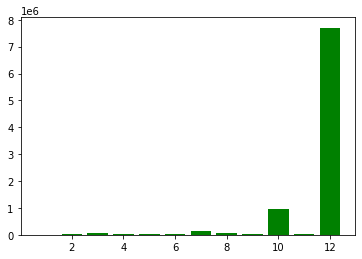



Expenses vs month


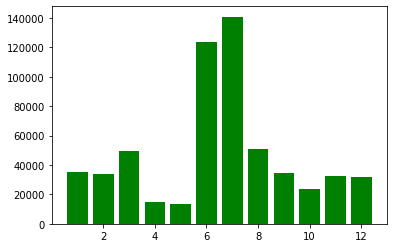

In [ ]:
print("Earnings vs month")
plt.bar(total_earnings_dictionary.keys(), total_earnings_dictionary.values(), color='g')
plt.show()
print("\n\nExpenses vs month")
plt.bar(total_expenses_dictionary.keys(), total_expenses_dictionary.values(), color='g')
plt.show()

### Some remarks from the above comparison:


*   The user receives most of his earnings at the end of the year. Maybe he/she is an employee who receives income annually, or runs a highly seasonal business which is at its peak during December.

*   The user has maximum expenses in June and July. This might be because he/she is buying the inventory for the business during that time. Or because he/she has kids who go to schools (academic year starts in June) and that might increase the expenses


*   Finally, the above discussion assumes that the all earnings and expenses of the user is captured via SMS. The duckling library might also be prone to errors

